# 1. Exploratory Data Analysis (EDA)

In [1]:
# Load the Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [2]:
# Check for missing values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [3]:
# Drop columns that are not needed
df = df.drop(columns=['Unnamed: 32'])

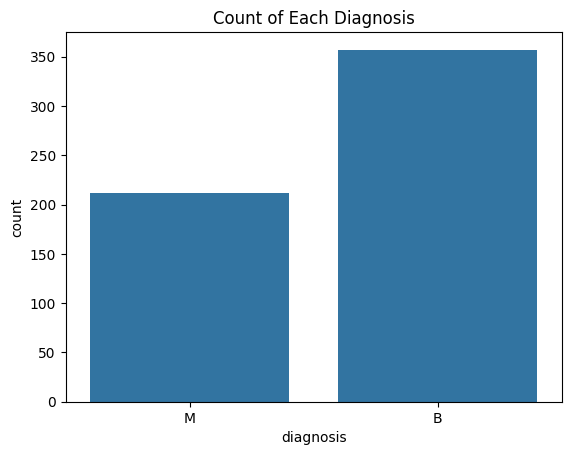

In [4]:
# Create a countplot for diagnosis
sns.countplot(x='diagnosis', data=df)
plt.title('Count of Each Diagnosis')
plt.show()

# 2. Data Preprocessing, Building Models, and Evaluation

In [5]:
# Count unique values in the 'diagnosis' column
print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [6]:
# Map categorical values to numerical values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # mapping for malignant (M) and benign (B)

In [7]:
# Split the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement and Evaluate Classification Models

In [8]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Initialize imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_imputed, y_train)  # Use imputed data for training

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_imputed)  # Use imputed data for prediction
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')

Logistic Regression Accuracy: 0.6316


In [12]:
# K-Nearest Neighbours (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer  # Import SimpleImputer if not already done

# Initialize imputer (if not already initialized)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data (if not already done)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the model
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train) # Fit the model to the training data

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbours Accuracy: {accuracy_knn:.4f}')

K-Nearest Neighbours Accuracy: 0.7135


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [13]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

Random Forest Accuracy: 0.9708


In [14]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC()
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machines Accuracy: {accuracy_svm:.4f}')

Support Vector Machines Accuracy: 0.6316


# Determine the Best Model

In [15]:
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')
print(f'K-Nearest Neighbours Accuracy: {accuracy_knn:.4f}')
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(f'Support Vector Machines Accuracy: {accuracy_svm:.4f}')

Logistic Regression Accuracy: 0.6316
K-Nearest Neighbours Accuracy: 0.7135
Random Forest Accuracy: 0.9708
Support Vector Machines Accuracy: 0.6316


**Analysis and Comparison:**

*Random Forest:*

Accuracy: 0.9708

Observation: This model has the highest accuracy among the four models. It indicates that the Random Forest classifier is performing very well on the dataset, correctly classifying a significant majority of the samples.

*K-Nearest Neighbours (KNN):*

Accuracy: 0.7135

Observation: The KNN model also performs reasonably well but is less accurate than the Random Forest. It shows better performance compared to Logistic Regression and SVM, indicating that the choice of k and distance metric used in KNN is reasonable.

*Logistic Regression:*

Accuracy: 0.6316

Observation: This model has lower accuracy compared to Random Forest and KNN. This might be due to the linear nature of Logistic Regression, which may not capture complex relationships in the data as effectively as Random Forest.

*Support Vector Machines (SVM):*

Accuracy: 0.6316

Observation: The SVM model performs similarly to Logistic Regression, indicating that the chosen kernel and hyperparameters may not be optimal for this dataset.

**Conclusion:**

*Best Model:* Random Forest is the best performing model based on accuracy. It achieves the highest accuracy of 97.08%, indicating that it is most effective in classifying the samples correctly.

*Model Improvements:* For other models like Logistic Regression and SVM, you might consider further hyperparameter tuning, feature engineering, or using different kernels (for SVM) to potentially improve their performance.

Random Forest's high accuracy suggests it is the most suitable model for this classification task given the current setup.